Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (2)
## 21.04.2020. 

Filip Rinkovec


***
<font color='red'>
Preimenovati svesku: File/Rename u __saobracaj2_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Model sa promenljivom brzinom
Simulirati model protoka saobraćaja koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + \frac{\partial}{\partial x}\left(v(\rho)\rho(x,t)\right) = 0
\end{equation}

u kome brzina vozila nije konstantna već zavisi od gustine (a samim tim i od koordinate $x$ i vremena $t$). 

U fajlu <font color='blue'>traffic_data.csv</font> nalaze se podaci dobijeni snimanjem protoka saobraćaja u Linkoln tunelu, koji prolazi ispod reke Hadson i povezuje Nju Džersi sa centrom Menhetna. U prvoj koloni nalazi se gustina vozila (data u jedinicama kola/milji) a u drugoj koloni njhova brzina (data u jedinicama milja/sat).

a) Koristeći se pandas bibliotekom, napraviti Python skriptu u okviru koje treba učitati .csv fajl, a zatim konvertovati jedinice u kola/kilometru (1/km) i kilometar/sat (km/h) i prikazati ovu zavisnost u okviru jednog scatter grafika. Obeležiti ose grafika. 

<Figure size 500x500 with 0 Axes>

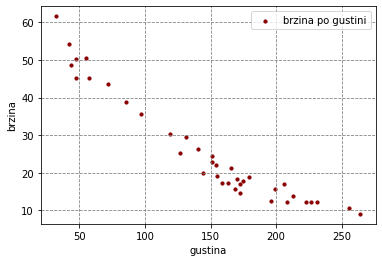

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

data=pd.read_csv('traffic_data.csv')

for i in range(38):
  data.brzina[i]=data.brzina[i]*1.6
  data.gustina[i]=data.gustina[i]*1.6


tmin=min(data.gustina)
tmax=max(data.gustina)
t=np.linspace(tmin,tmax,1000)
#x0=data.brzina[0]


plt.figure(figsize=(5,5),dpi=100)
data.plot(kind='scatter',x='gustina',y='brzina',s=10,color='DarkRed',label='brzina po gustini')
plt.grid(b=True, which='both', color='grey',linestyle='--')

plt.legend()
plt.show()

Grinšilds-ov model pretpostavlja linearnu zavisnost brzine od gustine i dat je sledećom linearnom funkcijom:

\begin{equation}
    v(\rho) = v_\text{m}\left(1 - \frac{\rho}{\rho_\text{m}}\right)
\end{equation}

gde je $v_\text{m}$ maksimalna brzina vozila, a $\rho_\text{m}$ maksimalna gustina vozila (kada bi sva vozila bila pozicionirana jedna iza drugog, bez razmaka). 

b) Koristeći <font color='blue'>scipy.optimize.curve_fit</font> (Python funkcija koja povlači optimalnu pravu kroz dati skup tačaka, pogledati help) pronaći koeficijente $v_\text{m}$ i $\rho_\text{m}$ koji definišu optimalnu pravu. Koeficijente pronaći u jedinicama km/h i 1/km, respektivno. Nacrtati grafik na kome su eksperimentalni podaci nacrtati crvenim tačkama, a optimalna prava plavom linijom. Obeležiti ose grafika i na grafik staviti legendu. 

(Napomena: ukoliko se čini da je dobijena maksimalna brzina vozila previše mala, treba imati na umu da u tunelu postoji rigorozno ograničenje brzine. Proveriti dobijenu vrednost iz Python modela sa realnim ograničenjem koje se može naći na linku: https://en.wikipedia.org/wiki/Lincoln_Tunnel pod stavkom “operating speed”).


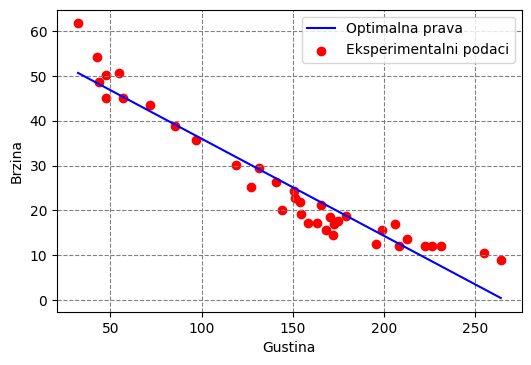

57.57445804049258
266.6334835889923


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np


def funkcija(ro,Vmax,romax):
  return Vmax*(1-ro/romax)

t=np.linspace(min(data.gustina),max(data.gustina),1000)

popt,_ = curve_fit(funkcija,data.gustina,data.brzina)

plt.figure(dpi=100)
#data.plot(kind='scatter',x='gustina',y='brzina',s=10,color='DarkRed',label='brzina po gustini')
plt.scatter(data.gustina,data.brzina,color='red',label="Eksperimentalni podaci")
plt.plot(t,funkcija(t,popt[0],popt[1]),color='blue',label="Optimalna prava")
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.xlabel("Gustina")
plt.ylabel("Brzina")
plt.legend()

plt.show()
print(popt[0])
print(popt[1])

Vm=57.57445804049258

rom=266.6334835889923

c) Uzimajući u obzir funkcijsku zavisnost brzine od gustine, srediti jednačinu u oblik pogodan za primenu metode konačnih razlika, tako da jednačina ima formu:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + c(\rho)\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

gde je $c(\rho)$ funkcija u kojoj kao promenljiva figuriše samo gustina $\rho$, a kao konstante maksimalna brzina $v_\text{m}$ i maksimalna gustina $\rho_\text{m}$. Napisati dobijenu funkciju $c(\rho)$:


$c(\rho)$=vm*(1-2*$\rho$/$\rho$m)

d)	U daljem nastavku Python skripte primeniti metodu konačnih razlika za rešavanje gornje parcijalne diferencijalne jednačine koja modeluje protok saobraćaja. Na gornju jednačinu primeniti metodu konačnih razlika za sledeće parametre:

<ol>
    <li>Ukupna dužina posmatranog puta $L = 2.4$ km,</li>
    <li>Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li>Koraci diskretizacije: $\Delta x = 0.05$ km, $\Delta t = 0.1$ s.</li>
</ol>

Za rešavanje jednačine potrebno je poznavanje početnog, odnosno graničnog uslova. Početni i granični uslov treba definisati tako da se modeluje semafor koji na koordinati $x = 0$ u trenutku $t = 0$ prelazi iz crvenog u zeleno. Pretpostavka je da je crveno svetlo na semaforu trajalo dovoljno dugo tako da se u trenutku $t = 0$ sva vozila nalaze iza semafora, a da ispred semafora nema nijednog vozila. Simulirati dan kada je na putu nije bilo velike gužve, tj. kada gustina vozila iza semafora ima vrednost $0.3\rho_\text{m}$.


Napisati početni i granični uslov. 

Nacrtati 3D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ i $t$. Obeležiti ose grafika. 

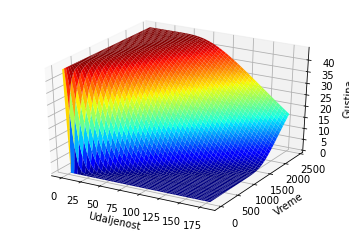

In [91]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

def funkcija2(ro,Vmax,romax):
  return Vmax*(1-2*ro/romax)


L=2.4*1000
T=180
deltax=0.05*1000
deltat=0.1

matrix_height = int(L / deltax) - 1
matrix_width = int(T / deltat) - 1
matrix = np.zeros((matrix_height, matrix_width))

popt2,_ = curve_fit(funkcija2,data.gustina,data.brzina)

for i in range (matrix_width):
  Ums=popt2[1]*1000/3600
  matrix[0,i]=0.3*Ums

#brzina je pretvarana u m/s

for x in range(1, matrix_height):
    for t in range(matrix_width-1):
        matrix[x, t+1] = matrix[x,t]-funkcija2(matrix[x,t],popt2[0]*1000/3600,popt2[1]*1000/3600)*deltat/deltax*(matrix[x,t]-matrix[x-1,t])


x = np.linspace(0, L, matrix_width)
y = np.linspace(0, T, matrix_height)
X, Y = np.meshgrid(y, x)
fig = plt.figure(0)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.transpose(matrix), cmap='jet', linewidth=0, antialiased=True)
ax.set_xlabel("Udaljenost")
ax.set_ylabel("Vreme")
ax.set_zlabel("Gustina")
plt.show()

Nacrtati 2D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ za tri vremenska trenutka (izabrati po želji, recimo $t = 100$, $120$ i $160$ sekudni ili neka druga tri vremenska trenutka koja bolje demonstriraju dinamiku promene gustine vozila). Obeležiti ose grafika i uneti legendu. 

No handles with labels found to put in legend.


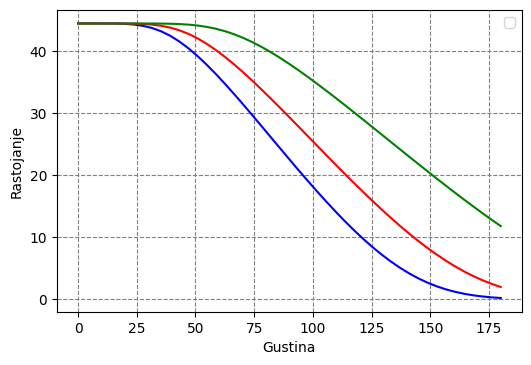

In [92]:
from matplotlib import pyplot as plt


tNew=[100,120,160]


plt.figure(dpi=100)

plt.plot(y,matrix[:,int(tNew[0]*matrix_width/T)],color='blue')
plt.plot(y,matrix[:,int(tNew[1]*matrix_width/T)],color='red')
plt.plot(y,matrix[:,int(tNew[2]*matrix_width/T)],color='green')
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.xlabel("Gustina")
plt.ylabel("Rastojanje")
plt.legend()

plt.show()

Komentarisati dobijene grafike i na osnovu njih objasniti ponašanje vozila u ovakvom modelu. 

Uneti komentar.

Diskutovati šta se dešava kada bi gužva na putu bila jako velika, odnosno kada bi gustina vozila iza semafora bila jako velika ($0.8\rho_\text{m}$). Ponoviti prethodni 3D kao i 2D grafik za promenjeni granični/početni uslov. 

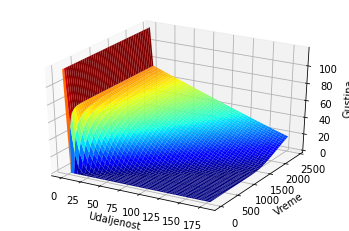

No handles with labels found to put in legend.


<Figure size 600x400 with 0 Axes>

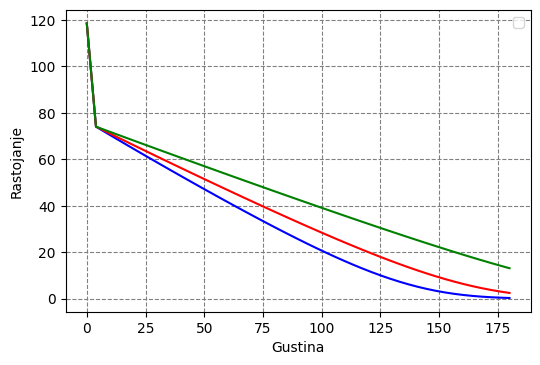

In [93]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

def funkcija2(ro,Vmax,romax):
  return Vmax*(1-2*ro/romax)


L=2.4*1000
T=180
deltax=0.05*1000
deltat=0.1

matrix_height = int(L / deltax) - 1
matrix_width = int(T / deltat) - 1
matrix = np.zeros((matrix_height, matrix_width))

popt2,_ = curve_fit(funkcija2,data.gustina,data.brzina)

for i in range (matrix_width):
  Ums=popt2[1]*1000/3600
  matrix[0,i]=0.8*Ums



for x in range(1, matrix_height):
    for t in range(matrix_width-1):
        matrix[x, t+1] = matrix[x,t]-funkcija2(matrix[x,t],popt2[0]*1000/3600,popt2[1]*1000/3600)*deltat/deltax*(matrix[x,t]-matrix[x-1,t])


x = np.linspace(0, L, matrix_width)
y = np.linspace(0, T, matrix_height)
X, Y = np.meshgrid(y, x)
fig = plt.figure(0)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.transpose(matrix), cmap='jet', linewidth=0, antialiased=True)
ax.set_xlabel("Udaljenost")
ax.set_ylabel("Vreme")
ax.set_zlabel("Gustina")
plt.show()

plt.figure(dpi=100)

tNew=[100,120,160]


plt.figure(dpi=100)

plt.plot(y,matrix[:,int(tNew[0]*matrix_width/T)],color='blue')
plt.plot(y,matrix[:,int(tNew[1]*matrix_width/T)],color='red')
plt.plot(y,matrix[:,int(tNew[2]*matrix_width/T)],color='green')
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.xlabel("Gustina")
plt.ylabel("Rastojanje")
plt.legend()

plt.show()

Uneti komentar.